In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

**Importing the dataset**

In [13]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [14]:
print(data.shape)
data.info()

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
data.drop("User ID", axis = 1, inplace = True)

In [16]:
print(data.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [19]:
X = data_df.drop("Purchased", axis = 1)
y = data_df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train

,Age,EstimatedSalary,Gender_Male
239,53,143000,0
151,41,45000,1
397,50,20000,0
44,28,84000,0
275,57,74000,1
...,...,...,...
253,37,146000,0
186,20,82000,0
297,43,112000,0
380,42,64000,1


**Feature Scaling**

In [20]:
data_df = pd.get_dummies(data, columns = ['Gender'], drop_first=True)
data_df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [22]:
col=X.columns
print(col)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = col)
X_test = pd.DataFrame(X_test, columns = col)
print(X_train)

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')
          Age  EstimatedSalary  Gender_Male
0    0.833333         0.948148          0.0
1    0.547619         0.222222          1.0
2    0.761905         0.037037          0.0
3    0.238095         0.511111          0.0
4    0.928571         0.437037          1.0
..        ...              ...          ...
275  0.452381         0.970370          0.0
276  0.047619         0.496296          0.0
277  0.595238         0.718519          0.0
278  0.571429         0.362963          1.0
279  0.714286         0.933333          1.0

[280 rows x 3 columns]


**Fitting Decision Tree Classification to the Training set**

In [25]:
decision_tree_model=DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [26]:
y_pred=decision_tree_model.predict(X_test)

**Making the Confusion Matrix**

In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Confusion Matix")
print(cm)

Accuracy: 0.8833333333333333
Precision: 0.8611111111111112
Recall: 0.775
Confusion Matix
[[75  5]
 [ 9 31]]


**Visualising the Training set results**

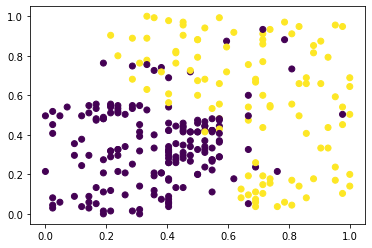

In [28]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c = y_train)

**Visualising the Test set results**

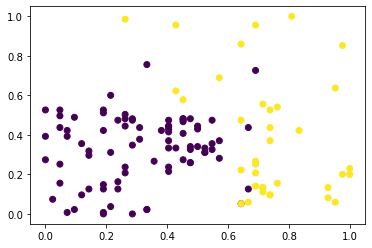

In [29]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c = y_pred)